Import Libraries :

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Data Collection :

In [111]:
car_dataset = pd.read_csv("car_dataset.csv")

Data Analysis :

In [112]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [113]:
#Checking number of rows and columns

car_dataset.shape

(301, 9)

In [114]:
#Getting info about dataset

car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [115]:
#Checking for missing values

car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [116]:
#Checking Distribution of categorical Data

car_dataset['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [117]:
car_dataset['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [118]:
car_dataset['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

Data Pre-Processing :

In [119]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [120]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [121]:
car_dataset = car_dataset.drop(columns = 'Car_Name', axis =1)

In [122]:
car_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


In [123]:
cor = car_dataset.corr()
print(cor)

                   Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
Year           1.000000       0.236141      -0.047584   -0.524342   0.053643   
Selling_Price  0.236141       1.000000       0.878983    0.029187   0.509467   
Present_Price -0.047584       0.878983       1.000000    0.203647   0.440415   
Kms_Driven    -0.524342       0.029187       0.203647    1.000000   0.166801   
Fuel_Type      0.053643       0.509467       0.440415    0.166801   1.000000   
Seller_Type   -0.039896      -0.550724      -0.512030   -0.101419  -0.352415   
Transmission  -0.000394       0.367128       0.348715    0.162510   0.080466   
Owner         -0.182104      -0.088344       0.008057    0.089216  -0.055705   

               Seller_Type  Transmission     Owner  
Year             -0.039896     -0.000394 -0.182104  
Selling_Price    -0.550724      0.367128 -0.088344  
Present_Price    -0.512030      0.348715  0.008057  
Kms_Driven       -0.101419      0.162510  0.089216  
Fuel_Type     

Splitting the features and target :

In [124]:
X = car_dataset.drop(['Selling_Price', 'Seller_Type'], axis = 1)
Y = car_dataset['Selling_Price']

In [125]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Transmission  Owner
0    2014           5.59       27000          0             0      0
1    2013           9.54       43000          1             0      0
2    2017           9.85        6900          0             0      0
3    2011           4.15        5200          0             0      0
4    2014           6.87       42450          1             0      0
..    ...            ...         ...        ...           ...    ...
296  2016          11.60       33988          1             0      0
297  2015           5.90       60000          0             0      0
298  2009          11.00       87934          0             0      0
299  2017          12.50        9000          1             0      0
300  2016           5.90        5464          0             0      0

[301 rows x 6 columns]


In [126]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Testing data :

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = None)

Model Training :

Linear Regression :

In [128]:
lin_model = LinearRegression()

In [129]:
lin_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation :

In [130]:
#prediction on training data

train_pred = lin_model.predict(X_train)

In [131]:
# R sq Error :

r2_train = r2_score(Y_train, train_pred)
print("R sq Error : ", r2_train)

R sq Error :  0.8754694630698943


In [132]:
#prediction on testing data 

test_pred = lin_model.predict(X_test)

In [133]:
# R sq Error :

r2_test = r2_score(Y_test, test_pred)
print("R sq Error : ", r2_test)

R sq Error :  0.846706661274196


Visualizing the actual and predicted prices  

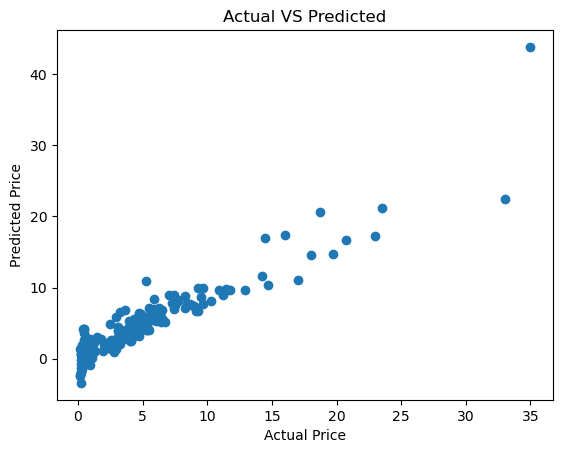

In [134]:
plt.scatter(Y_train, train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual VS Predicted")
plt.show()